# mel spectrogram
Source: hands-on-artificial-intelligence for IoT

In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Get the file path to the included audio example
filename = librosa.util.example_audio_file()

In [2]:
filename

'C:\\Users\\31653\\AppData\\Local\\librosa\\librosa\\Cache\\Kevin_MacLeod_-_Vibe_Ace.hq.ogg'

In [3]:
input_length=16000*4
def audio_norm(data):
    # Function to Normalize
    max_data = np.max(data)
    min_data = np.min(data)
    data = (data-min_data)/(max_data-min_data) 
    return data

def load_audio_file(file_path, 
            input_length=input_length):
    # Function to load an audio file and 
    # return a 1D numpy array 
    data, sr = librosa.load(file_path, sr=None)
 
    max_offset = abs(len(data)-input_length)
    offset = np.random.randint(max_offset)
    if len(data)>input_length:
        data = data[offset:(input_length+offset)]
    else:
        data = np.pad(data, (offset, 
            input_size - len(data) - offset), 
            "constant")    
 
    data = audio_norm(data)
    return data

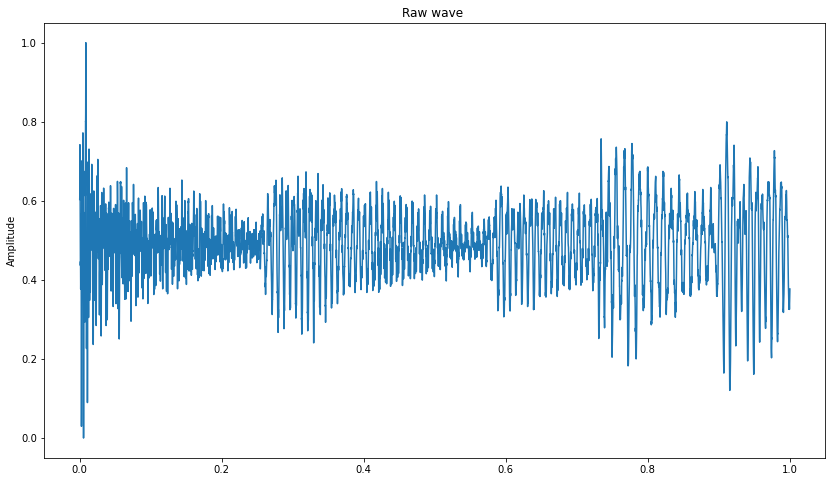

In [4]:
data_base = load_audio_file(filename)
fig = plt.figure(figsize=(14, 8))
plt.title('Raw wave ')
plt.ylabel('Amplitude')
plt.plot(np.linspace(0, 1, input_length), data_base)
plt.show()

In [5]:
def preprocess_audio_mel_T(audio, sample_rate=16000, 
        window_size=20, #log_specgram
        step_size=10, eps=1e-10):

    mel_spec = librosa.feature.melspectrogram(y=audio,
             sr=sample_rate, n_mels= 256)
    mel_db = (librosa.power_to_db(mel_spec,
         ref=np.max) + 40)/40
    return mel_db.T


def load_audio_file2(file_path,
             input_length=input_length):
    #Function to load the audio file  
    data, sr = librosa.load(file_path, sr=None)
 
    max_offset = abs(len(data)-input_length)
    offset = np.random.randint(max_offset)
    if len(data)>input_length:
        data = data[offset:(input_length+offset)]
    else:
        data = np.pad(data, (offset, 
            input_size - len(data) - offset),
            "constant")
 
    data = preprocess_audio_mel_T(data, sr)
    return data

(126, 256)


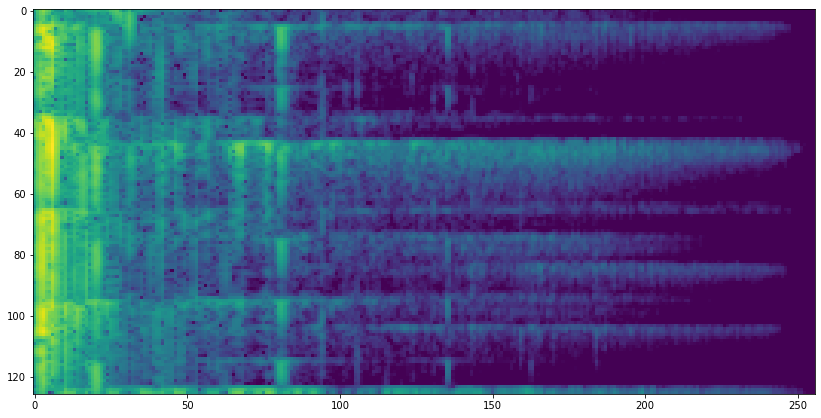

In [6]:
data_base = load_audio_file2(filename)
print(data_base.shape)
fig = plt.figure(figsize=(14, 8))
plt.imshow(data_base)